In [11]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [12]:
df = pd.read_csv("data/original/dataset.csv")
df.head()

/var/folders/5w/bchvy66s6vbgncfkws1skvf40000gp/T/ipykernel_82630/1191278436.py:1: DtypeWarning: Columns (10,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/original/dataset.csv")


,SessionID,Start,End,kWh,Revenue,InternalNum,City,Station,PortNum,PortType,...,Client,Tariff,MaxPower,Fishka,Successful,DisconnectionReason,Latitude,Longitude,Type,ChargingTime
0,591686,2021-01-01 00:05:34,2021-01-01 00:31:22,6.033,27.15,28410100,Київ,209,3,Type 2 Plug,...,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST,25.80
1,591720,2021-01-01 01:40:37,2021-01-01 01:42:19,0.890,6.22,25840200,Київ,111,1,CHAdeMO,...,550843379,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST,1.70
2,591749,2021-01-01 02:12:35,2021-01-01 03:07:36,3.300,14.85,40112300,Стрый,147,1,Type 2,...,540085134,4.50,NaN,True,True,NaN,49.24778,23.85610,SLOW,55.02
3,591755,2021-01-01 02:32:21,2021-01-01 02:57:08,6.880,48.09,25840200,Київ,111,1,CHAdeMO,...,828881697,6.99,NaN,True,True,NaN,50.48207,30.48725,FAST,24.78
4,591783,2021-01-01 03:39:03,2021-01-01 04:02:05,12.630,56.84,28410100,Київ,209,3,Type 2 Plug,...,553804960,4.50,NaN,True,True,NaN,50.43104,30.39037,FAST,23.03


# EDA

In [13]:
print(df['kWh'].describe())

count    372187.000000
mean          8.171009
std          14.269730
min           0.000000
25%           0.000000
50%           0.000000
75%          10.820000
max         111.708000
Name: kWh, dtype: float64


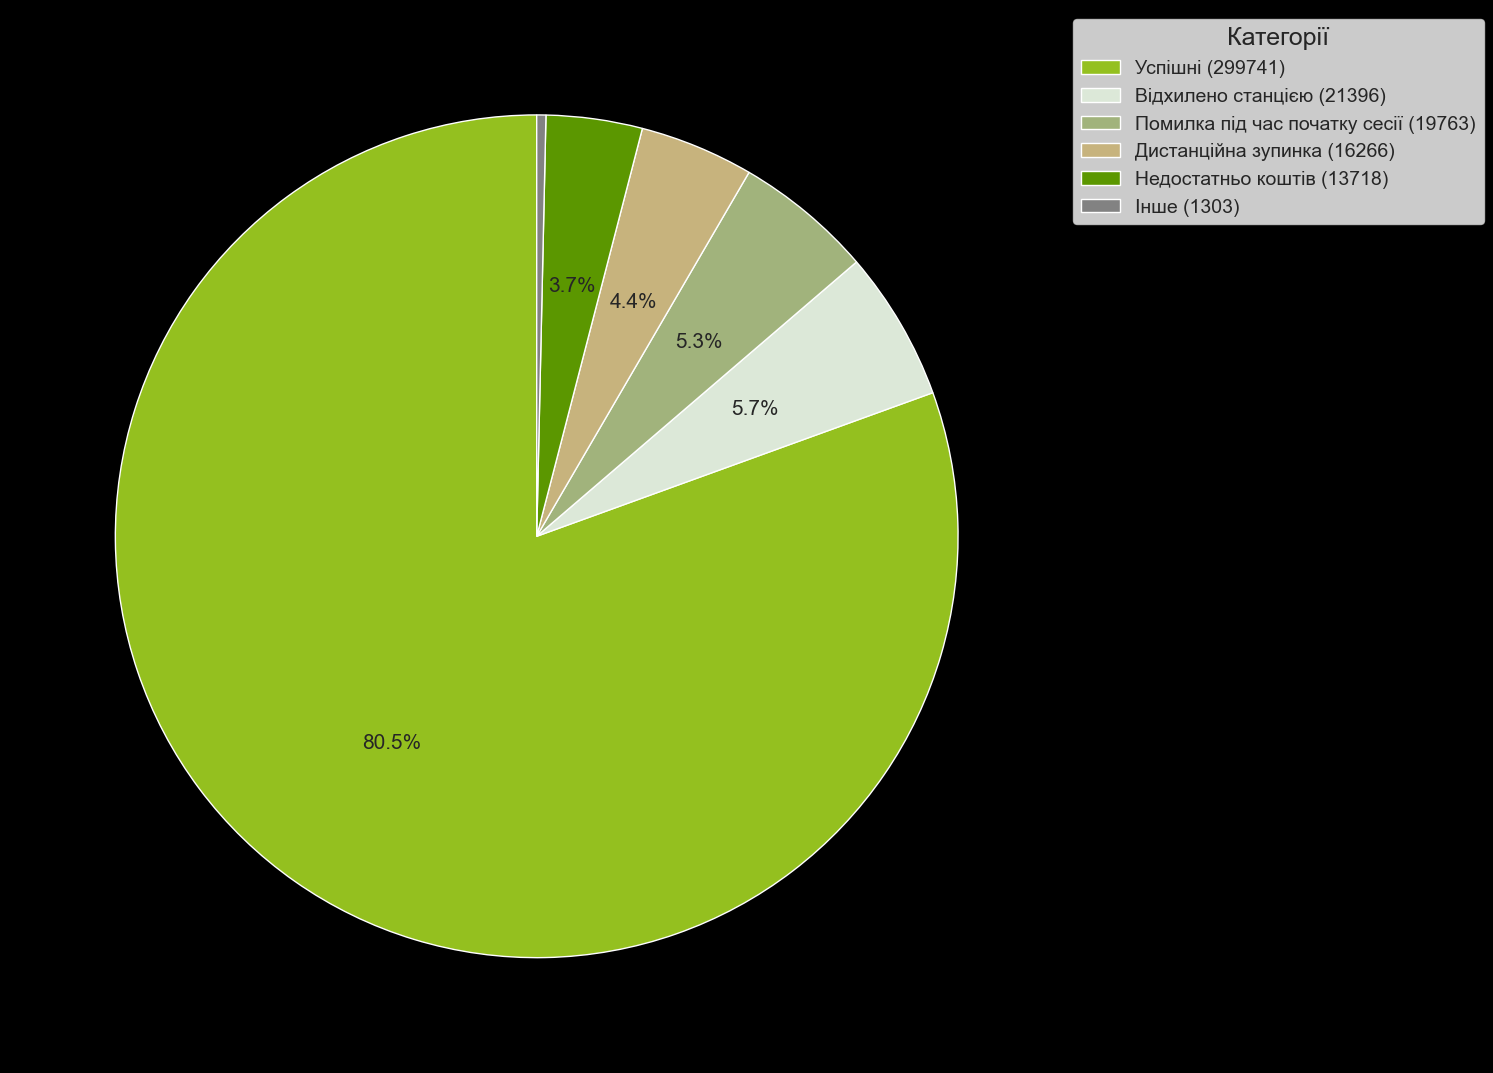

In [14]:
df['DisconnectionReason'] = df['DisconnectionReason'].fillna('Successful')
counts = df['DisconnectionReason'].value_counts()
counts = counts.rename(index={'Successful': 'Успішні'})

top_4_counts = counts.head(5)
other_count = counts[5:].sum()
counts_for_pie = pd.concat([top_4_counts, pd.Series({'Інше': other_count})])

def autopct_func(pct, allvalues):
    absolute = int(pct / 100.*sum(allvalues))
    if absolute == other_count:
        return ''  
    return f"{pct:.1f}%"

plt.figure(figsize=(15, 15), facecolor='black')
wedges, texts, autotexts = plt.pie(
    counts_for_pie, 
    autopct=lambda pct: autopct_func(pct, counts_for_pie.values), 
    startangle=90, 
    colors=['#94C01F', '#DCE8D8', '#A1B37C', '#C7B37D', '#5B9700', '#828282'],
    labels=[None] * len(counts_for_pie)
)

for autotext in autotexts:
    autotext.set_fontsize(15)

plt.legend(
    wedges, 
    [f"{label} ({value})" for label, value in zip(counts_for_pie.index, counts_for_pie.values)], 
    title="Категорії", 
    title_fontsize=18,
    loc="upper left", 
    bbox_to_anchor=(1, 0, 0.5, 1), 
    fontsize=14
)

plt.tight_layout()
plt.show()


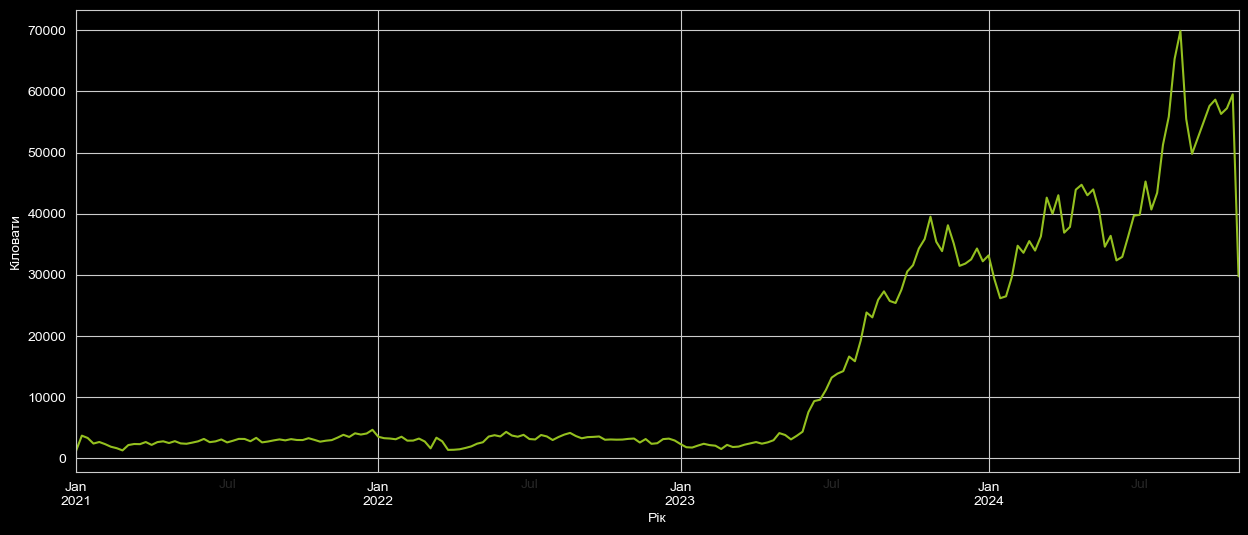

In [15]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Date'] = pd.to_datetime(df['Start'].dt.date)

weekly_kWh = df.resample('W', on='Date')['kWh'].sum()

plt.figure(figsize=(15, 6))
ax = weekly_kWh.plot(kind='line', color='#94C01F')

ax.set_facecolor('black')
plt.gca().figure.set_facecolor('black')
plt.xlabel('Рік', color='white')
plt.ylabel('Кіловати', color='white')

plt.gca().tick_params(colors='white')

plt.show()


In [16]:
weekly_revenue = df.resample('W', on='Date')['Revenue'].sum()

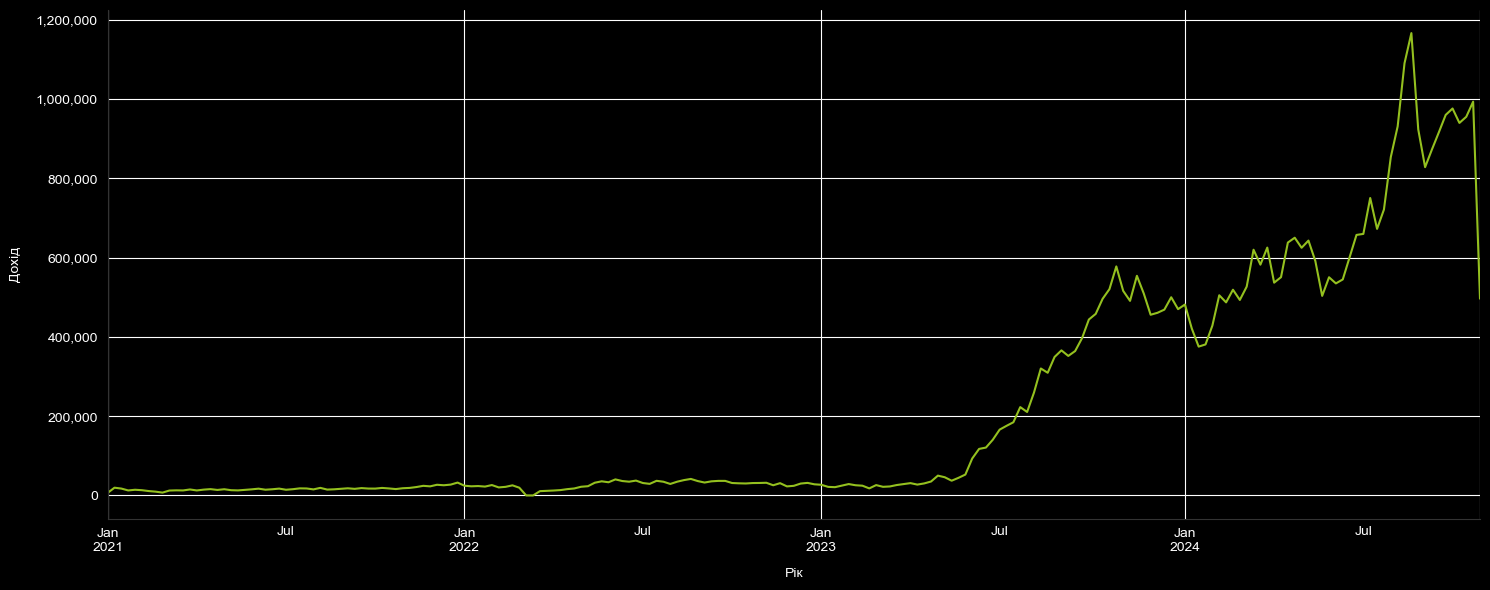

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(15, 6))

plt.rcParams['axes.formatter.useoffset'] = False
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

weekly_revenue.plot(kind='line', color='#94C01F', linewidth=1.5)

plt.xlabel('Рік', labelpad=10)
plt.ylabel('Дохід', labelpad=10)

def format_func(value, tick_number):
    return f"{int(value):,}"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')

plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(0)

plt.tight_layout()

plt.show()

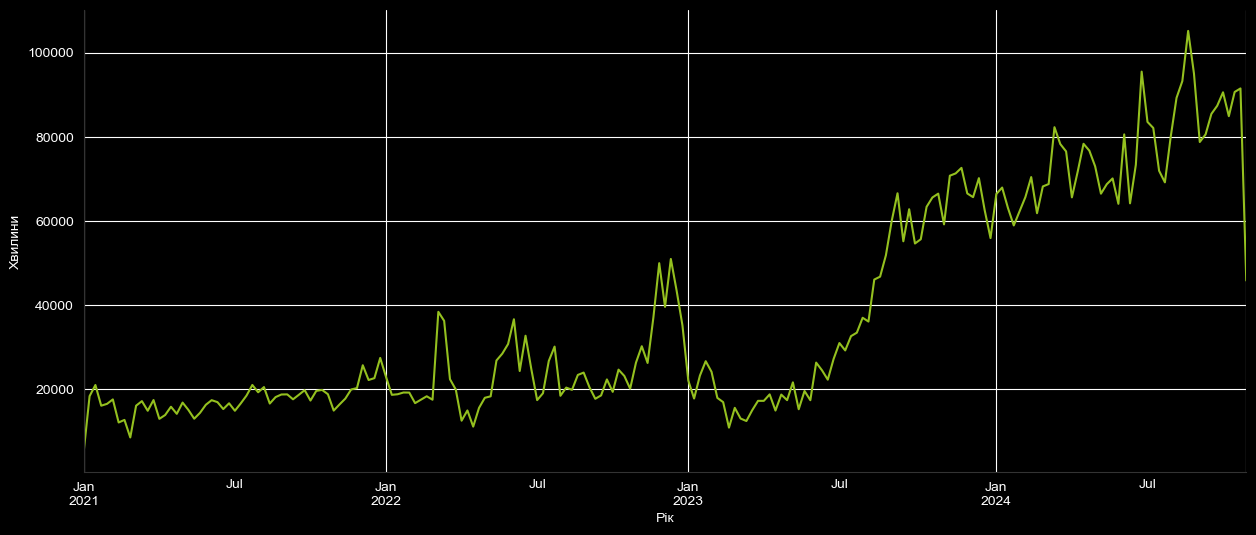

In [18]:
weekly_charging_time = df.resample('W', on='Date')['ChargingTime'].sum()
plt.figure(figsize=(15, 6))
weekly_charging_time.plot(kind='line', color='#94C01F')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
plt.xlabel('Рік')
plt.ylabel('Хвилини')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(0)
plt.show()

In [19]:
weekly_charging_time = df.resample('H', on='time')['kWh'].sum()
weekly_charging_time = weekly_charging_time.rolling(window=24*7).mean()

plt.figure(figsize=(15, 6))
weekly_charging_time.plot(kind='line', color='#94C01F')
ax = plt.gca()

# Remove the top and right spines completely
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
# Customize the bottom and left spines
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')

# Set axis labels
plt.xlabel('Рік')
plt.ylabel('Хвилини')

# Set plot and figure background colors
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(0)

# Display the plot
plt.show()

KeyError: 'time'

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04781D+00    |proj g|=  5.44346D-01

At iterate    5    f=  7.26241D-01    |proj g|=  1.38672D-01

At iterate   10    f=  6.67410D-01    |proj g|=  6.69576D-02

At iterate   15    f=  6.23988D-01    |proj g|=  2.18957D-01

At iterate   20    f=  6.00872D-01    |proj g|=  1.44573D-01

At iterate   25    f=  5.93947D-01    |proj g|=  2.80552D-01

At iterate   30    f=  5.86115D-01    |proj g|=  3.53411D-01

At iterate   35    f=  5.82463D-01    |proj g|=  1.20891D-01

At iterate   40    f=  5.79710D-01    |proj g|=  2.43247D-01

At iterate   45    f=  5.78772D-01    |proj g|=  9.17342D-02

At iterate   50    f=  5.78595D-01    |proj g|=  1.57190D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/levkupybida/miniforge3/envs/ENV/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


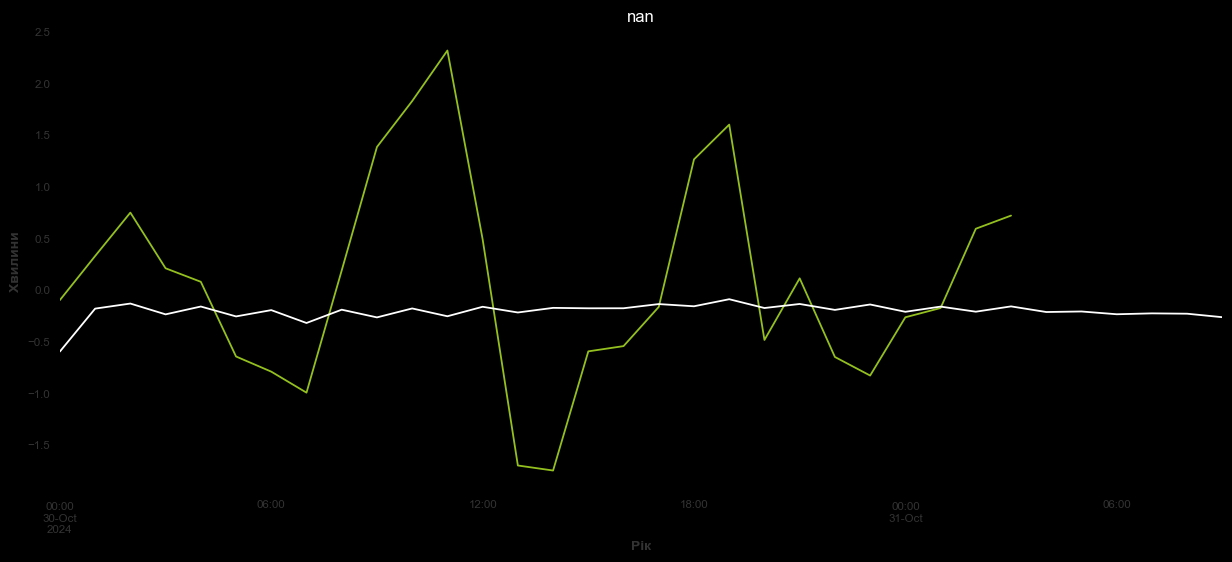

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from statsmodels.tools.eval_measures import rmse

df = pd.read_csv('data/clean/hourly.csv')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df.set_index(df['time'], inplace=True)
df = df.sort_index()
df['kWh'] = df['kWh'].rolling(window=24*7).mean()
df = df.dropna()

decomposition_additive = seasonal_decompose(df['kWh'], model='additive', period=24)

test_resid = decomposition_additive.resid.loc['2024-10-30 00:00:00':'2024-10-31 09:00:00']
train_resid = decomposition_additive.resid.loc['2021-01-01 00:00:00':'2024-10-30 00:00:00']

test_seasonal = decomposition_additive.seasonal.loc['2024-10-30 00:00:00':'2024-10-31 09:00:00']
train_seasonal = decomposition_additive.seasonal.loc['2021-01-01 00:00:00':'2024-10-30 00:00:00']

test_trend = decomposition_additive.trend.loc['2024-10-30 00:00:00':'2024-10-31 09:00:00']
train_trend = decomposition_additive.trend.loc['2021-01-01 00:00:00':'2024-10-30 00:00:00']

model_sarima = SARIMAX(endog=train_resid, order=(5,2,5), seasonal_order=(1,1,1,24), dates=df['time']).fit()
preds_resid = model_sarima.predict(start='2024-10-30 00:00:00', end='2024-10-31 09:00:00')
preds_trend = test_trend
preds_seasonal = train_seasonal
preds_overall = preds_resid+test_trend+test_seasonal

weekly_charging_time = test_resid
preds_overall = preds_resid
plt.figure(figsize=(15, 6))
plt.title(rmse(preds_resid, test_resid))
weekly_charging_time.plot(kind='line', color='#94C01F')
preds_overall.plot(kind='line', color='#FFFFFF')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
plt.xlabel('Рік')
plt.ylabel('Хвилини')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(0)
plt.grid(False)
plt.show()

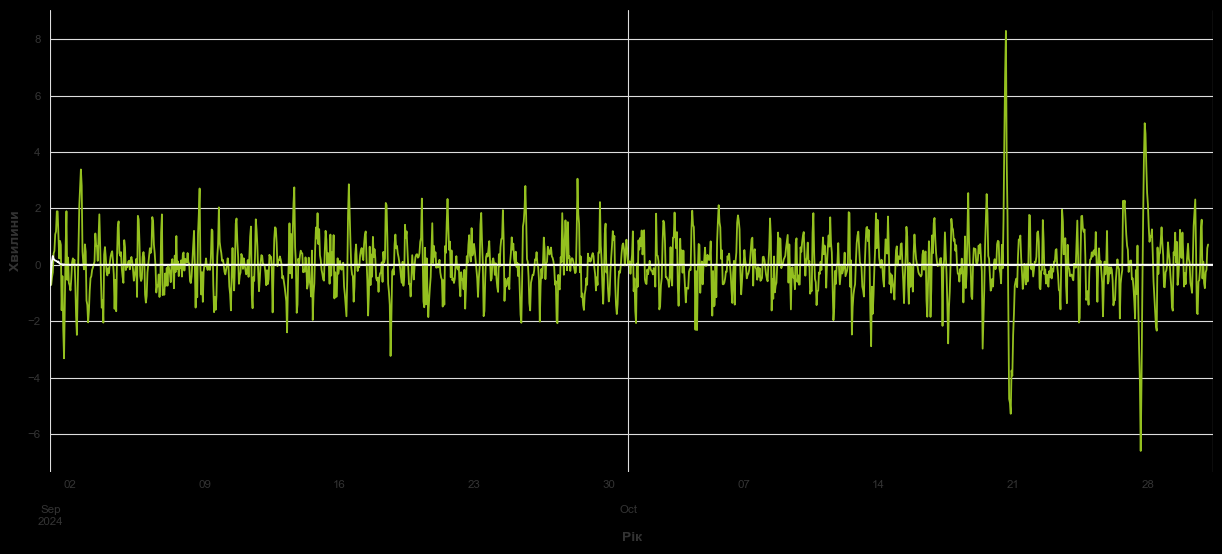

In [46]:
weekly_charging_time = test_resid
preds_overall = preds_resid
plt.figure(figsize=(15, 6))
weekly_charging_time.plot(kind='line', color='#94C01F')
preds_overall.plot(kind='line', color='#FFFFFF')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('#333333')
ax.spines['left'].set_color('#333333')
plt.xlabel('Рік')
plt.ylabel('Хвилини')
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')
plt.gcf().patch.set_edgecolor('black')
plt.gcf().patch.set_linewidth(0)
plt.show()

In [43]:


rmse(preds_resid, test_resid)

nan

In [49]:
preds_resid

2024-09-01 00:00:00   -7.292968e-01
2024-09-01 01:00:00   -2.134950e-01
2024-09-01 02:00:00    1.343224e-01
2024-09-01 03:00:00    3.091650e-01
2024-09-01 04:00:00    2.035254e-01
                           ...     
2024-10-31 05:00:00   -5.740849e-39
2024-10-31 06:00:00    4.714374e-39
2024-10-31 07:00:00   -2.606376e-39
2024-10-31 08:00:00    7.041562e-41
2024-10-31 09:00:00    2.203597e-39
Freq: h, Name: predicted_mean, Length: 1450, dtype: float64

In [50]:
test_resid

time
2024-09-01 00:00:00   -0.705443
2024-09-01 01:00:00   -0.715754
2024-09-01 02:00:00   -0.448869
2024-09-01 03:00:00   -0.274249
2024-09-01 04:00:00    0.398520
                         ...   
2024-10-31 05:00:00         NaN
2024-10-31 06:00:00         NaN
2024-10-31 07:00:00         NaN
2024-10-31 08:00:00         NaN
2024-10-31 09:00:00         NaN
Name: resid, Length: 1450, dtype: float64

In [37]:
preds_resid+test_trend+test_seasonal

2024-09-01 00:00:00    345.421402
2024-09-01 01:00:00    345.460372
2024-09-01 02:00:00    345.433567
2024-09-01 03:00:00    345.363962
2024-09-01 04:00:00    345.050392
                          ...    
2024-10-31 05:00:00           NaN
2024-10-31 06:00:00           NaN
2024-10-31 07:00:00           NaN
2024-10-31 08:00:00           NaN
2024-10-31 09:00:00           NaN
Freq: h, Length: 1450, dtype: float64